# Imports and settings

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Initial Data loading and understanding

In [25]:
df = pd.read_csv('../Data Collection/Datasets/batdongsan.com/raw/batdongsan.csv')
# Select only the specific columns you're interested in
df.head()

,Diện tích,Hướng ban công,Hướng nhà,Mặt tiền,Mức giá,Mức giá internet,Mức giá nước,Mức giá điện,Nội thất,Pháp lý,Số phòng ngủ,"Số phòng tắm, vệ sinh",Số tầng,Thời gian dự kiến vào ở,Tiện ích,title,url,Đường vào
0,107 m²,NaN,NaN,NaN,Thỏa thuận,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,3 phòng,2 phòng,NaN,NaN,NaN,"Bán căn hộ Han Jardin T6 và T7 view hồ, giá từ...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,NaN
1,65 m²,NaN,NaN,NaN,"3,4 tỷ",NaN,NaN,NaN,Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,2 phòng,NaN,NaN,NaN,Gia đình em bán căn hộ tòa Park - 65m2 - full ...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,NaN
2,50 m²,NaN,Bắc,4 m,"6,55 tỷ",NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN,NaN,NaN,NaN,NaN,"Bán đất dịch vụ 3 phường Đồng Mai, quận Hà Đôn...",https://batdongsan.com.vn/ban-dat-duong-co-ban...,13 m
3,150 m²,NaN,Đông - Nam,5 m,"7,99 tỷ",NaN,NaN,NaN,Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,1 phòng,1 tầng,NaN,NaN,Giảm 500 Triệu Nhà C4 5mx30m Mặt Tiền Đường Ph...,https://batdongsan.com.vn/ban-nha-mat-pho-duon...,20 m
4,62 m²,NaN,NaN,NaN,"1,99 tỷ",NaN,NaN,NaN,NaN,Hợp đồng mua bán,2 phòng,2 phòng,NaN,NaN,NaN,GIA ĐÌNH CÓ 2 CĂN 62M2 HƯỚNG ĐÔNG NAM CẦN BÁN....,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,NaN


In [26]:
print("\nBasic information:")
df.info()


Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17702 entries, 0 to 17701
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Diện tích                17701 non-null  object
 1   Hướng ban công           3619 non-null   object
 2   Hướng nhà                6021 non-null   object
 3   Mặt tiền                 8154 non-null   object
 4   Mức giá                  17701 non-null  object
 5   Mức giá internet         250 non-null    object
 6   Mức giá nước             367 non-null    object
 7   Mức giá điện             398 non-null    object
 8   Nội thất                 7969 non-null   object
 9   Pháp lý                  13624 non-null  object
 10  Số phòng ngủ             10069 non-null  object
 11  Số phòng tắm, vệ sinh    9717 non-null   object
 12  Số tầng                  5438 non-null   object
 13  Thời gian dự kiến vào ở  438 non-null    object
 14  Tiện ích          

In [27]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Diện tích,Hướng ban công,Hướng nhà,Mặt tiền,Mức giá,Mức giá internet,Mức giá nước,Mức giá điện,Nội thất,Pháp lý,Số phòng ngủ,"Số phòng tắm, vệ sinh",Số tầng,Thời gian dự kiến vào ở,Tiện ích,title,url,Đường vào
count,17701,3619,6021,8154,17701,250,367,398,7969,13624,10069,9717,5438,438,278,17701,17701,6916
unique,1694,8,8,334,1459,2,3,3,386,147,49,48,15,4,7,10405,10431,115
top,100 m²,Đông - Nam,Đông - Nam,5 m,Thỏa thuận,Thỏa thuận,Theo nhà cung cấp,Theo nhà cung cấp,Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,2 phòng,3 tầng,Ở ngay,"Camera, Bảo vệ, PCCC","Ms Bích, Căn góc biển Sun Costa Residence, giá...",https://batdongsan.com.vn/ban-can-ho-chung-cu-...,6 m
freq,588,1237,1306,1387,2380,219,284,310,3860,10082,3929,4615,1199,341,148,200,200,837


In [28]:
# Choosing relevant columns
df = df[['Diện tích', 'Hướng ban công', 'Hướng nhà', 'Mặt tiền', 'Mức giá', 'Nội thất', 'Pháp lý', 'Số phòng ngủ', 'Số phòng tắm, vệ sinh', 'Số tầng', 'title', 'Đường vào']]

## Duplicate

In [29]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 7271


In [30]:
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New number of rows: {len(df)}")

Duplicates removed. New number of rows: 10431


## Missing value

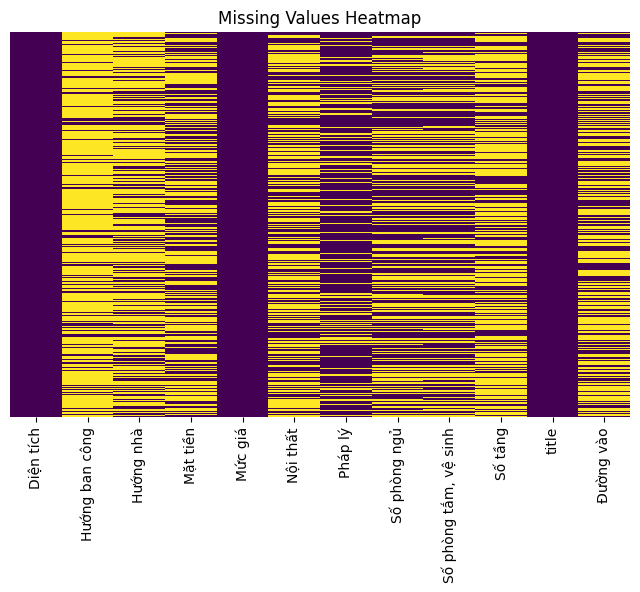

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [32]:
# Check stats of missing values
missing_stats = df.isnull().sum()
missing_stats = missing_stats[missing_stats > 0]
missing_stats = missing_stats.reset_index()
missing_stats.columns = ['Column', 'Missing Values']
missing_stats['Percentage'] = (missing_stats['Missing Values'] / len(df)) * 100
print("\nMissing values statistics:")
print(missing_stats)


Missing values statistics:
                   Column  Missing Values  Percentage
0               Diện tích               1        0.01
1          Hướng ban công            8471       81.21
2               Hướng nhà            7084       67.91
3                Mặt tiền            5358       51.37
4                 Mức giá               1        0.01
5                Nội thất            5696       54.61
6                 Pháp lý            2367       22.69
7            Số phòng ngủ            4429       42.46
8   Số phòng tắm, vệ sinh            4566       43.77
9                 Số tầng            6616       63.43
10                  title               1        0.01
11              Đường vào            6108       58.56


# Type conversion?

In [33]:
df.head()

,Diện tích,Hướng ban công,Hướng nhà,Mặt tiền,Mức giá,Nội thất,Pháp lý,Số phòng ngủ,"Số phòng tắm, vệ sinh",Số tầng,title,Đường vào
0,107 m²,NaN,NaN,NaN,Thỏa thuận,NaN,Sổ đỏ/ Sổ hồng,3 phòng,2 phòng,NaN,"Bán căn hộ Han Jardin T6 và T7 view hồ, giá từ...",NaN
1,65 m²,NaN,NaN,NaN,"3,4 tỷ",Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,2 phòng,NaN,Gia đình em bán căn hộ tòa Park - 65m2 - full ...,NaN
2,50 m²,NaN,Bắc,4 m,"6,55 tỷ",NaN,Sổ đỏ/ Sổ hồng,NaN,NaN,NaN,"Bán đất dịch vụ 3 phường Đồng Mai, quận Hà Đôn...",13 m
3,150 m²,NaN,Đông - Nam,5 m,"7,99 tỷ",Đầy đủ,Sổ đỏ/ Sổ hồng,2 phòng,1 phòng,1 tầng,Giảm 500 Triệu Nhà C4 5mx30m Mặt Tiền Đường Ph...,20 m
4,62 m²,NaN,NaN,NaN,"1,99 tỷ",NaN,Hợp đồng mua bán,2 phòng,2 phòng,NaN,GIA ĐÌNH CÓ 2 CĂN 62M2 HƯỚNG ĐÔNG NAM CẦN BÁN....,NaN
